In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [391]:
# load the data
data = '/Users/astrid/Documents/Machine_learning/machine-learning-ex2/ex2/ex2data1.txt'
df = pd.read_csv(data, header=None)
df.columns=['exam1','exam2','admitted']
df.head()
df.shape

(100, 3)

In [392]:
# Create the matrices
X = np.matrix(df)[:,:2]
y = np.matrix(df)[:,2]

# add ones to matrix X
X = np.insert(X,0,1.0,axis=1)

# create initia theta
initial_theta = np.zeros((X.shape[1],1)) # X.shape returns (m,n), X.shape[1] returns n


In [393]:
initial_theta #.reshape(1,X.shape[1])

array([[ 0.],
       [ 0.],
       [ 0.]])

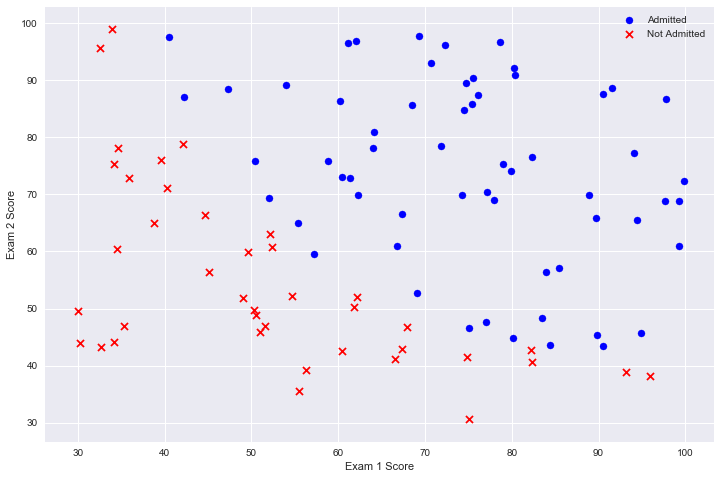

In [394]:
# Plot the data
positive = df[df['admitted'].isin([1])] 
negative = df[df['admitted'].isin([0])]

#df.plot('exam1','exam2',c='admitted' ,kind='scatter',cmap=plt.cm.autumn)
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')  
plt.show;

In [251]:
# Sigmoid function
def sigmoid_f(z):
    g = 1/(1+ np.exp(-z))    
    return g

In [255]:
sigmoid_f(np.dot(X,initial_theta));

In [277]:
# Cost function
def compute_cost(theta,X,y):   
    m,n = X.shape
    theta = theta.reshape((n,1)); # the minimising function returns a new theta in a row form (1,n), because of this we need to reshape it to (n,1)
    J= (-1/m)*(sum(np.multiply(y,np.log(sigmoid_f(np.dot(X,theta)))) + 
            (np.multiply((1-y),np.log(1-(sigmoid_f(np.dot(X,theta))))))))
    grad = (1/m)*(np.transpose(X)*((sigmoid_f(np.dot(X,theta)))-y))
    return J ,grad

In [279]:
compute_cost(initial_theta,X,y)

(matrix([[ 0.69314718]]), matrix([[ -0.1       ],
         [-12.00921659],
         [-11.26284221]]))

In [269]:
print(compute_cost(initial_theta,X,y))

(matrix([[ 0.69314718]]), matrix([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]]))


In [244]:
test_theta = ([[-24],[0.2], [0.2]])
test_theta

[[-24], [0.2], [0.2]]

In [245]:
compute_cost(test_theta, X, y)

(matrix([[ 0.21833019]]), matrix([[ 0.04290299],
         [ 2.56623412],
         [ 2.64679737]]))

In [395]:
# fminunc / tnc
result = opt.minimize(fun=compute_cost,x0=initial_theta,args=(X, y),
                      method='TNC',jac=True,options={'maxiter':400});  
cost = result.fun
optimum_theta = result.x # it comes as a row instead of (n,1)

print (cost)
print(optimum_theta)

[[ 0.2034977]]
[-25.16131869   0.20623159   0.20147149]


In [410]:
# Prediction function
def predict(theta, X):
    m = X.size
    p = sigmoid_f(X*theta)>= 0.5 
    return p.astype(int)

In [365]:
X_test = np.matrix([1,45,85])
prob=sigmoid_f(X_test*theta)
#print(predict(optimum_theta,X))
print(prob)
               

[[ 0.77629062]]


In [414]:
# Accuracy
m,n = X.shape
#theta = theta.reshape((n,1))
optimum_theta = np.matrix(optimum_theta).reshape((n,1))
p=predict(optimum_theta,X);
print(np.mean(p==y)*100)

89.0
